In [9]:
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Process

Jag börjar med att gå igenom massa Kaggle och Github repos för att få en susning om hur man skall tänka och göra innan jag påbörjar detta i hopp om att slippa göra misstag.

dataset är enormt och jag vill undvika att cold start på koden eller trycka in den, så där det är möljligt försöker jag att använda folderstrukturen som redan finns.

Renskrivning av kod sker regelbundet med LLM. Speciellt efter man fastnar på ett syntaxproblematik som man inte kommer förbi.


In [15]:
# Define base path
base_path = r"C:\Coding\Python-Henrik-Pedersen-OPA2023\AI2-Lab2\Data"
train_data_path = os.path.join(base_path, "train")

# Define splits
splits = {
    "experiment_small_data": {
        "train": {"dogs": 800, "cats": 800},
        "val": {"dogs": 200, "cats": 200},
        "test": {"dogs": 250, "cats": 250},
    },
    "experiment_tiny_data": {
        "train": {"dogs": 80, "cats": 80},
        "val": {"dogs": 20, "cats": 20},
        "test": {"dogs": 25, "cats": 25},
    }
}

# Create directory structure
for exp_type, exp_splits in splits.items():
    for split_type, counts in exp_splits.items():
        for animal_type in counts.keys():
            os.makedirs(os.path.join(base_path, exp_type,
                        split_type, animal_type), exist_ok=True)

print("Folder structure created.")

Folder structure created.


In [5]:
import os

def copy_files(src_folder, dest_folder, num_files):
    files = [os.path.join(src_folder, f)
             for f in os.listdir(src_folder) if f.endswith(".jpg")]
    selected_files = random.sample(files, num_files)

    for file in selected_files:
        shutil.copy(file, dest_folder)


# Define base path
base_path = r"C:\Coding\Python-Henrik-Pedersen-OPA2023\AI2-Lab2\Data"

# Paths to original cat and dog images in the train folder
original_cats_path = os.path.join(base_path, 'train', 'cats')
original_dogs_path = os.path.join(base_path, 'train', 'dogs')

# Define splits
splits = {
    "experiment_small_data": {
        "train": {"dogs": 800, "cats": 800},
        "val": {"dogs": 200, "cats": 200},
        "test": {"dogs": 250, "cats": 250},
    },
    "experiment_tiny_data": {
        "train": {"dogs": 80, "cats": 80},
        "val": {"dogs": 20, "cats": 20},
        "test": {"dogs": 25, "cats": 25},
    }
}

# Create directory structure
for exp_type, exp_splits in splits.items():
    for split_type, counts in exp_splits.items():
        for animal_type in counts.keys():
            os.makedirs(os.path.join(base_path, exp_type,
                        split_type, animal_type), exist_ok=True)

# Copy files to corresponding directories
for exp_type, exp_splits in splits.items():
    for split_type, counts in exp_splits.items():
        copy_files(original_dogs_path, os.path.join(
            base_path, exp_type, split_type, 'dogs'), counts['dogs'])
        copy_files(original_cats_path, os.path.join(
            base_path, exp_type, split_type, 'cats'), counts['cats'])

print("Data split completed.")

Data split completed.


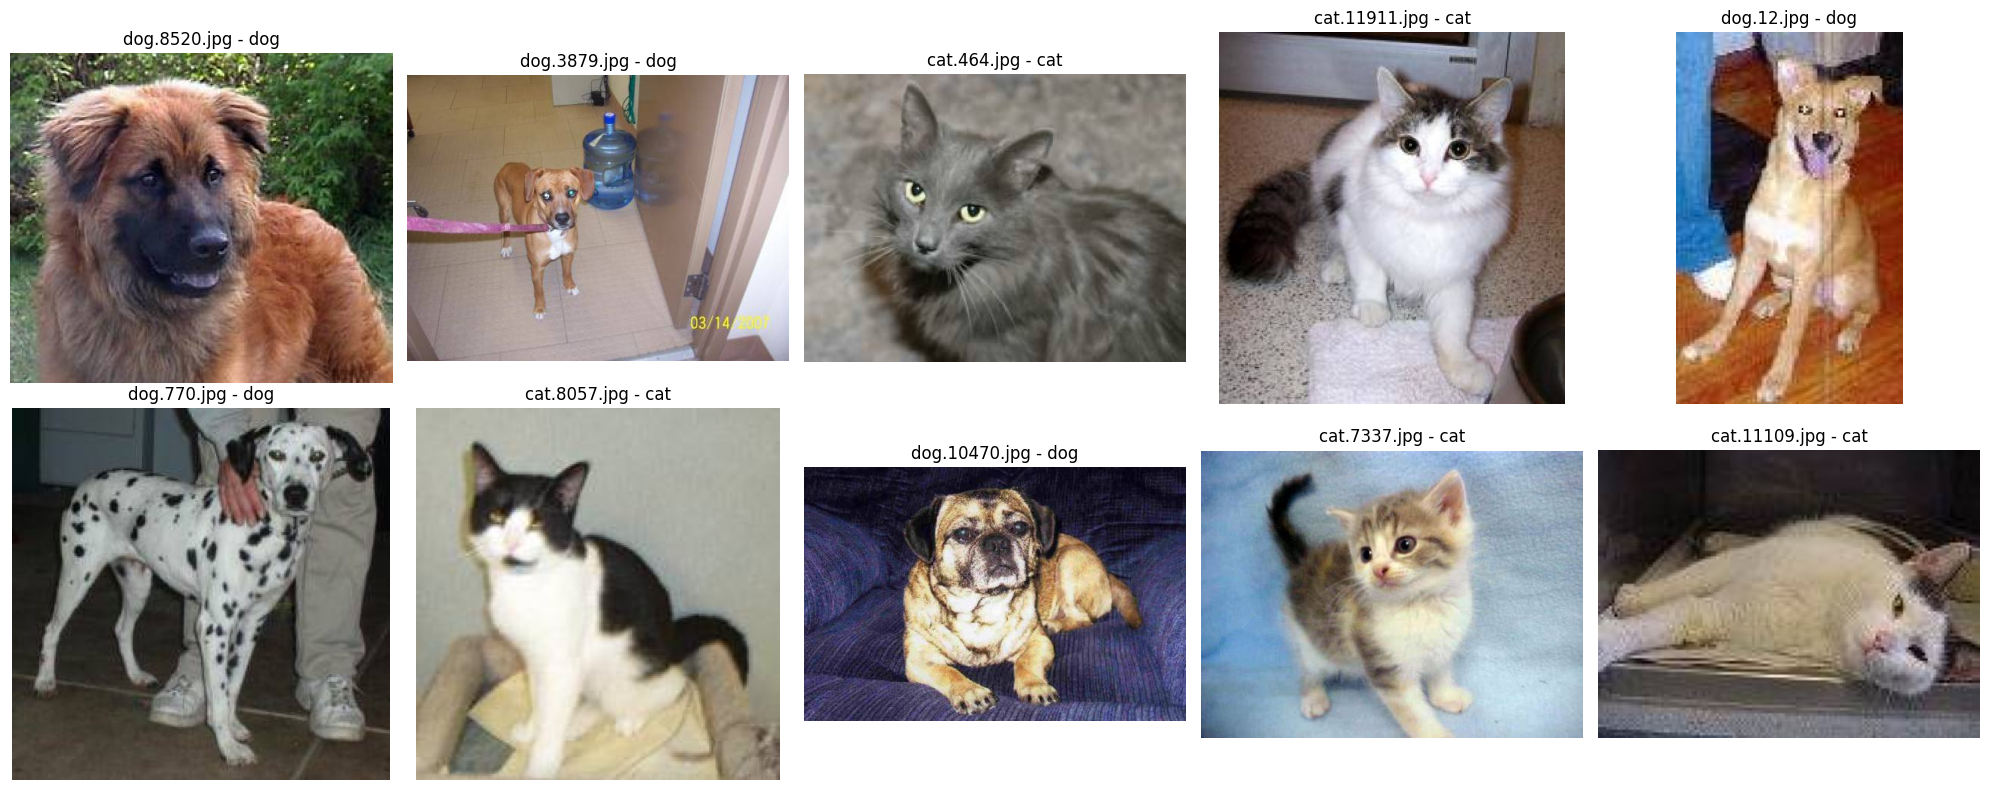

In [8]:
# Path to pics, first the base path followed by cats or dog folder depending on what image we want to take from.
base_path = r"C:\Coding\Python-Henrik-Pedersen-OPA2023\AI2-Lab2\Data\train" 
cats_path = os.path.join(base_path, "cats")
dogs_path = os.path.join(base_path, "dogs")

cat_images = [os.path.join(cats_path, img) for img in os.listdir(cats_path) if img.endswith(".jpg")]
dog_images = [os.path.join(dogs_path, img) for img in os.listdir(dogs_path) if img.endswith(".jpg")]

# Randomly select 5 images from each category
random_cat_images = random.sample(cat_images, 5)
random_dog_images = random.sample(dog_images, 5)

random_pics = random_cat_images + random_dog_images
random.shuffle(random_pics)  

num_images = len(random_pics)

# Subplots to not bloat my Jupiter
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for ax, img_path in zip(axes.flatten(), random_pics):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = "cat" if "cat" in os.path.basename(img_path) else "dog"
    ax.imshow(img_rgb)
    ax.set_title(f"{os.path.basename(img_path)} - {label}")
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()